# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report, precision_score
from sklearn.preprocessing import StandardScaler

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

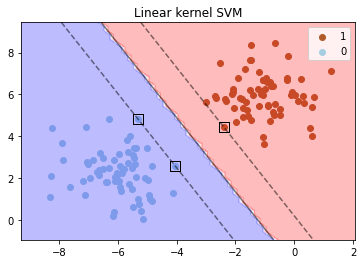

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

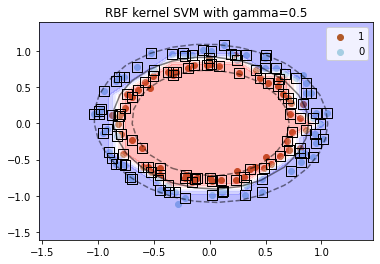

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# build the model
model = svm.SVC(kernel='rbf', random_state=33, gamma=0.5)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 0.5, X_train.iloc[:, 0].max() + 0.5
x2_min, x2_max = X_train.iloc[:, 1].min() - 0.5, X_train.iloc[:, 1].max() + 0.5

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('RBF kernel SVM with gamma=0.5')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

##### Answer: A RBF kernel should be used over a linear kernel if your data is linearly inseperable. Linear kernels determine a hyperplane to split classes without any non-linear mappings, so only linear patterns can be recognized. RBF kernels transform data non-linearly to a new space, making it possible to identify non-linear patterns in data with a hyperplane in the new space.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

##### Answer: SVMs in general assume that the data works in a standard range. Therefore normalization of your input data is needed for a kernel to work.

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [6]:
#Normalize data to fit in svm
x = gene_expression.values
#y = drug_response.values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
#y_scaled = scaler.fit_transform(y)
gene_expression_scaled = pd.DataFrame(x_scaled)
#drug_response_scaled = pd.DataFrame(y_scaled)

### Make drug response binary for classification between sensitive
# Calculate Z score of data entry (of YM155) to differentiate between resistant (Z>0 -> 0) and sensitive (Z<0 -> 1)
std = drug_response.describe().iloc[[2]].values[0][0]
mean = drug_response.describe().iloc[[1]].values[0][0]

# Z-score calculation: Z = (score - mean)/std 
df_target = drug_response.apply(lambda x: ((x-mean)/std),axis=1)
df_target.rename(columns={'YM155':'zscore'}, inplace=True)

# Create 2 columns target (0 or 1) and a type (resistent or sensitive) column for later reference
df_target['target'] = df_target['zscore'].apply(lambda x: int(1) if x<0 else int(0))
df_target['type'] = df_target['target'].apply(lambda x: "resistent" if x==0 else "sensitive")



# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(gene_expression_scaled, df_target, random_state=42, test_size=0.2)

In [7]:
# Predicting drug response on cell lines from gene expression
import warnings
warnings.filterwarnings('ignore')

# Define parameter grid for SVM (currently 1260 models each 5x cross validated)
# Takes roughly 1.5 minutes on 2017 TUE laptop.
param_grid_svm = [{"C": [1, 5, 10, 50, 100,500, 1000], 
               "kernel": ['poly', 'rbf', 'sigmoid'],
               "degree": [1,2,3,4,5,6],
               "gamma": [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1]},
]
clf = svm.SVC()

# Initialize grid search
grid_search_svm = GridSearchCV(clf, 
                           param_grid_svm, 
                           scoring="precision",
                           cv = 5,
                           verbose = 0)

# Fit grid search and show best estimator
grid_search_svm.fit(X_train, y_train['target'])
grid_search_svm.best_estimator_

SVC(C=50, degree=1, gamma=0.05, kernel='sigmoid')

In [8]:
# Predict new values with best estimator
y_hat = grid_search_svm.predict(X_test)
precision = precision_score(y_true = y_test['target'], y_pred= y_hat).round(4)

print(f"precision of best estimator from grid search on test data is: {precision}")

# use classification report
class_report = classification_report(y_test['target'], y_hat, output_dict=True)
print(f"The classification report: \n{class_report}")


precision of best estimator from grid search on test data is: 0.875
The classification report: 
{'0': {'precision': 0.6428571428571429, 'recall': 0.8181818181818182, 'f1-score': 0.7200000000000001, 'support': 11}, '1': {'precision': 0.875, 'recall': 0.7368421052631579, 'f1-score': 0.7999999999999999, 'support': 19}, 'accuracy': 0.7666666666666667, 'macro avg': {'precision': 0.7589285714285714, 'recall': 0.777511961722488, 'f1-score': 0.76, 'support': 30}, 'weighted avg': {'precision': 0.7898809523809525, 'recall': 0.7666666666666667, 'f1-score': 0.7706666666666667, 'support': 30}}


## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

In [9]:
# Random Forest
# Keeping the grid relatively small to avoid running for an hour (initially we had 2160 configurations all in cv=5 meaning over 10k fits)
# This parameter grid with cv=5 results in 300*5 =  1500 fits fits and takes approx 4.5 minutes on TUE laptop from 2017.
param_grid_rf = [{
    "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
    "criterion": ['gini', 'entropy'],
    "max_depth": [5, 10, 15],
    "min_samples_leaf": [1,2,3,4,5],
}]

clf = RandomForestClassifier(random_state=42)

# Initialize grid search
grid_search_rf = GridSearchCV(clf,
                            param_grid_rf,
                            scoring='precision',
                            cv=5,
                            verbose=1)

grid_search_rf.fit(X_train, y_train['target'])
grid_search_rf.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomForestClassifier(max_depth=10, n_estimators=30, random_state=42)

In [10]:
# Predict test values with best estimator
y_hat = grid_search_rf.predict(X_test)
precision = precision_score(y_true = y_test['target'], y_pred= y_hat).round(4)

print(f"precision of best estimator from grid search on test data is: {precision}")

# use classification report

class_report = classification_report(y_test['target'], y_hat, output_dict=True)
print(f"The classification report: \n{class_report}")

precision of best estimator from grid search on test data is: 0.7368
The classification report: 
{'0': {'precision': 0.5454545454545454, 'recall': 0.5454545454545454, 'f1-score': 0.5454545454545454, 'support': 11}, '1': {'precision': 0.7368421052631579, 'recall': 0.7368421052631579, 'f1-score': 0.7368421052631579, 'support': 19}, 'accuracy': 0.6666666666666666, 'macro avg': {'precision': 0.6411483253588517, 'recall': 0.6411483253588517, 'f1-score': 0.6411483253588517, 'support': 30}, 'weighted avg': {'precision': 0.6666666666666666, 'recall': 0.6666666666666666, 'f1-score': 0.6666666666666666, 'support': 30}}


Text(0.5, 1.0, 'Top 50 feature importances for the RF classifier')

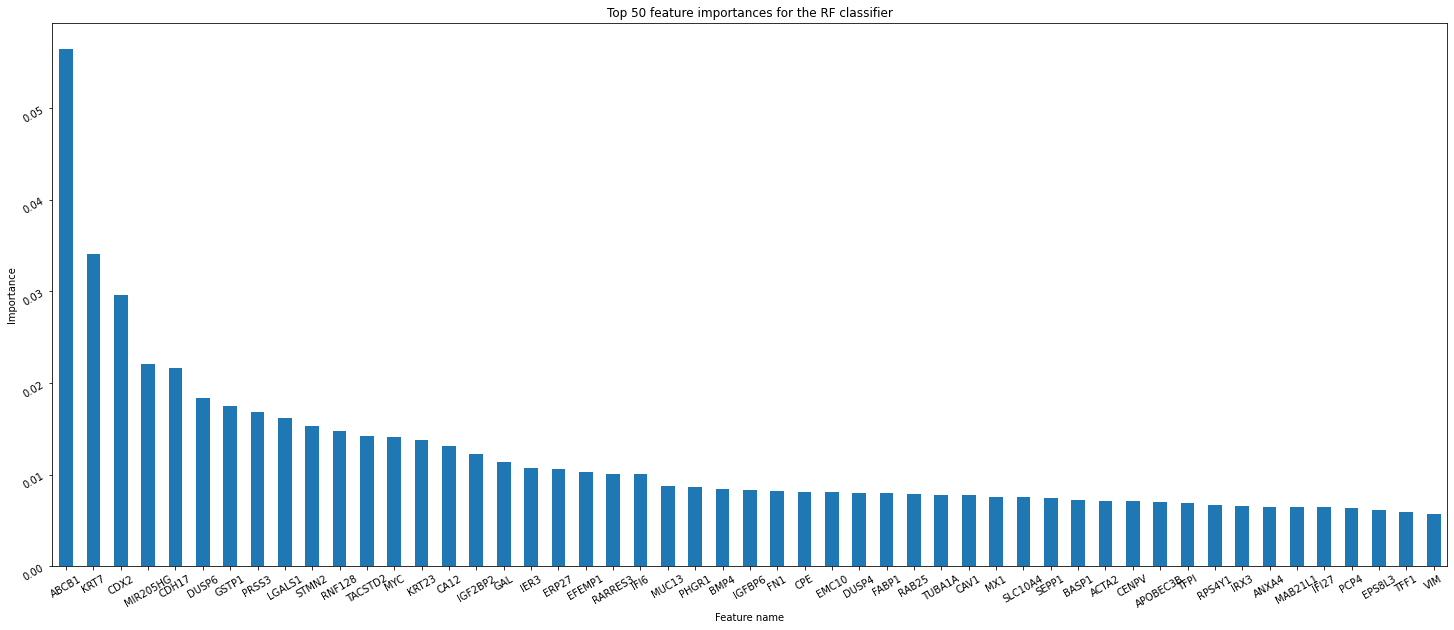

In [11]:
# Feature importances plot for RF

# Get feature names from original set
feature_names = gene_expression.columns.tolist()
# Get feature importances from grid search best estimator
importances = grid_search_rf.best_estimator_.feature_importances_

# Sort them using the python zip function
importances, feature_names = zip(*sorted(zip(importances, feature_names)))

# Extract only the 50 most important
forest_importances = pd.Series(importances[-51:], index=feature_names[-51:]).sort_values(ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(25,10))
ax = forest_importances.plot.bar()
ax.tick_params(labelrotation=30)
ax.set_ylabel("Importance")
ax.set_xlabel("Feature name")
ax.set_title("Top 50 feature importances for the RF classifier")


##### The model with the better performance if we look at precision score only is the Support Vector Machine with a weighted average precision of 0.7899, While the RF only came to a mean precision of 0.6666.

##### The precision of the separate target classes (0 or 1) have wildly different precision metrics for both models.
##### The target 0 has a precision score of 0.6428 and 0.5454 for SVM and RF respectivally.
##### The target 1 has a precision score of 0.8750 and 0.7368 for SVM and RF respectivally.

##### From the feature importance plot we can conclude that the gene expression ABCB1, KRT7, and CDX2 are the most important ones and the remainder of the top 50 are significantly less important but still relatively important. We've also reviewed the importances data values and some gene expressions have slim to no importance on the classification result. After roughly 20 features, the remainder of the top 50 features have approximately the same importance.

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

In the literature search the following paper was found:

Khalilia M., Chakraborty S., Popescu M. (2011). Predicting disease risks from highly imbalanced data using random forest. BMC Medical Informatics and Decision Making, 11 (1), art. no. 51. DOI: 10.1186/1472-6947-11-51

In this study random forest was compared to other methods like SVM for highly imbalanced data. For the available data, it is important that there is a good model performance for high dimensional data, which is the case for both RF and SVM. RF has some preferrable traits in this case, such as that it performs well for categorical data, has a high interpretability and it estimates the importance of variables used in classification. Furthermore it is more influenced by individual data points, which might lead to overfitting for outliers, but in the case of imbalanced data it might be advantageous because it can be used to discover trends that are present in very little data points. The paper concludes on finding the most accurate results for RF over the other methods tried. 